In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("WineQT.csv")
df.drop("Id", axis=1, inplace=True) 

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

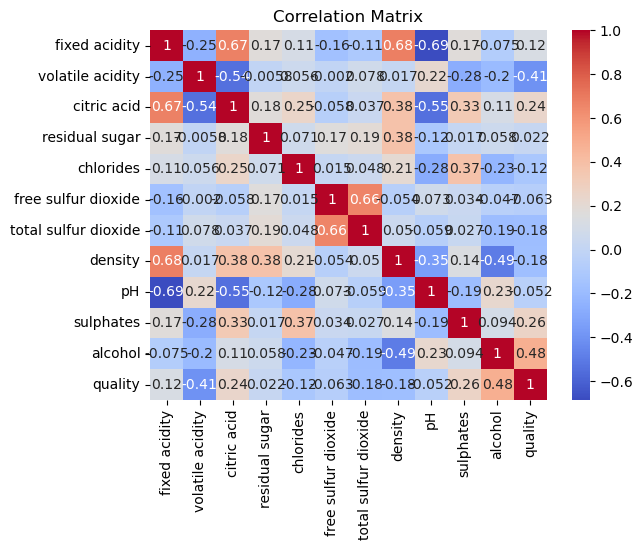

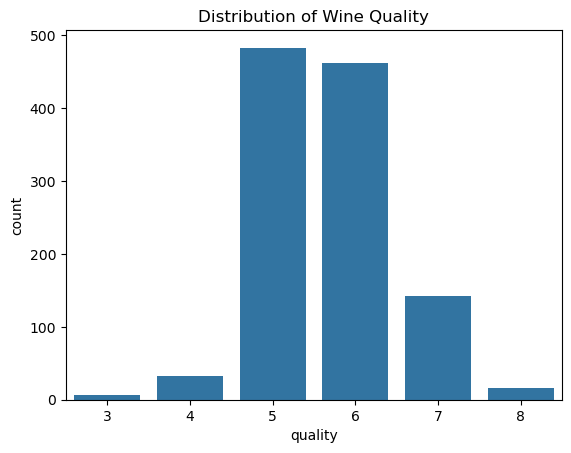

In [7]:
print(df.describe())
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality")
plt.show()

In [9]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [17]:
sgd = SGDClassifier()
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

In [19]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

Random Forest Accuracy: 0.6812227074235808
Classification Report for Random Forest:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.79      0.73        96
           6       0.66      0.64      0.65        99
           7       0.77      0.65      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.42      0.42       229
weighted avg       0.66      0.68      0.67       229



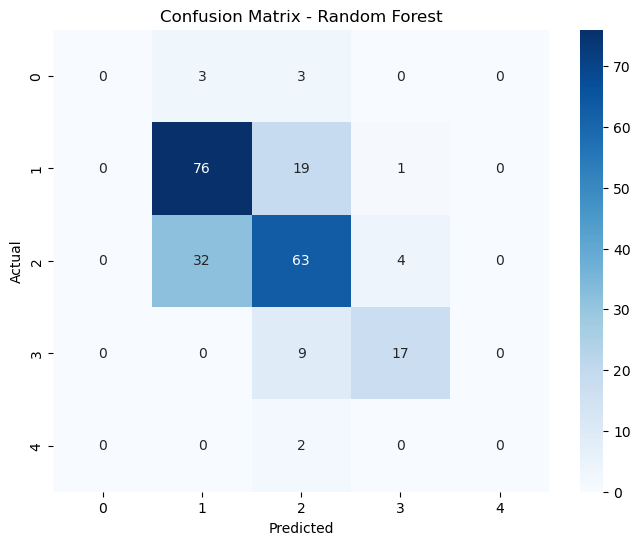

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Report with zero_division fix
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()